In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df=pd.read_csv('london_merged.csv',parse_dates=['timestamp'])
df.head()

In [ ]:
print('데이터 구조는":' ,df.shape)
print('데이터의 타입은:',df.dtypes)
print('데이터의 컬럼은', df.columns)



In [ ]:
# 각 컬럼별 결측치 -> null인 부분이 없어서 아마 00000
df.isna().sum()

# msno.matrix는 대규모 데이터 세트에서 누락된 데이터의 패턴을 빠르게 시각적으로 분석하는 데 매우 유용
msno.matrix(df)
plt.show()

```
## df
  ### pandas 'DataFrame'(2차원 레이블-행렬) 객체를 나타냄
  ### df['열이름'] 같이 특정열에 접근하는데 사용
  ```
```
## dt
  ### pandas에서 날짜와 시간관련 데이터를 다루기 위한 접근자
  ### series 객체에서 호출될수 있으며 datatime 타입일때 사용됩니다
  ```

In [ ]:



# df['이름'] 새로운 컬럼을 생성 -> year, month, dayofweek를 생성
df['year']=df['timestamp'].dt.year
df['month']=df['timestamp'].dt.month
df['dayofweek']=df['timestamp'].dt.dayofweek
df['hour']=df['timestamp'].dt.hour

df.head()


In [ ]:
df['weather_code'].value_counts()

### boxplot: 데이터 분포와 이상치를 시각화 하는데 사용

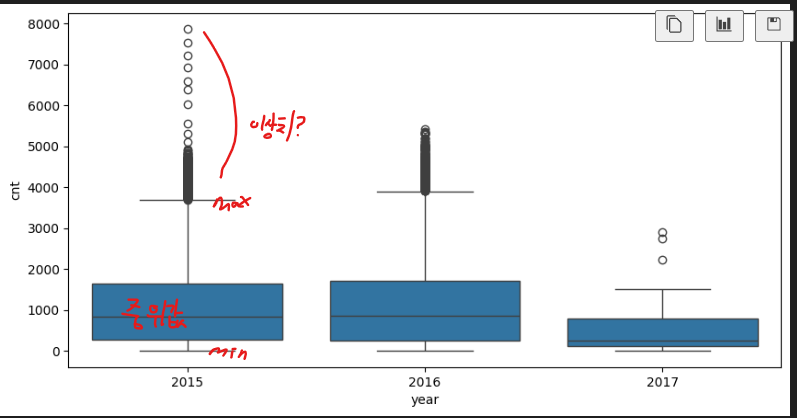

In [ ]:
#  plt.subplots
# 하나이상의 그래프를 포함할수 있는 figure 객체 하나 또는 여러개의 Axes 객체 생성
# 1,1: 하나의 행과 열로 구성된 그래프 격자를 만든다는 의미 
    # -> 결과적으로는 하나의 Axes를 생성
# figsize: 그래프 크기
a, b = plt.subplots(1, 1, figsize=(10, 5)) 

# seaborn의 boxplot 함수
#  대부분의 인자들이 키워드로 명시되어야 함
#  sns.boxplot(df['year'], df['cnt']) => 이렇게 쓰면 오류남

# boxplot: 데이터 분포와 이상치를 시각화 하는데 사용 
#b라는 Axes위에 박스플롯을 그리라는 의미
sns.boxplot(x=df['year'], y=df['cnt'], ax=b)  #year: 년도 , cnt: 자전거 이용객
# sns.barplot(x=df['year'], y=df['cnt'], ax=b)  #year: 년도 , cnt: 자전거 이용객
# sns.barplot(x='year',y='cnt', data=df)

plt.show()

In [ ]:
# case1 
# df['year']: DataFrame에서 직접적으로 열을 선택 
# 열의 이름을 문자열로 전달하는 것이 아니라 열자체를 직접 참조
# sns.boxplot(x=df['year'], y=df['cnt'], ax=b)  

# case2

# sns.barplot(x=feature,y='cnt', data=data,palette='Set3',orient='v')

# 그래프 함수 만들기
def plot_bar(data,feature):
    fig=plt.figure(figsize=(12,3))
    # df(csv)데이터를 이용해 hour데이터의 barplot 작성
    sns.barplot(x=feature,y='cnt', data=data,palette='Set3',orient='v')
   

In [ ]:
plot_bar(df,'hour')

## 시그마 이상치 제거

>>> 위에서 구한 위아래 이상치 0.3%로=> 정규분표포로 보면 양 끝간 0.3%로씩 제거(박스플롯으로 보면 min,max 벗어난 이상치 제거)<br><br>
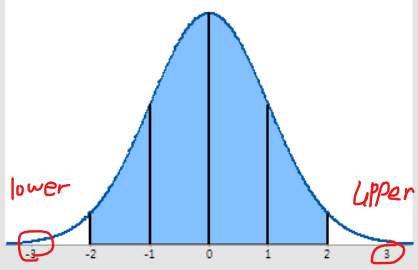
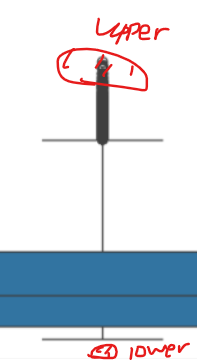

In [ ]:
# 아웃라이어 제거
def is_outlier(s):
    lower_limit=s.mean()-(s.std()*3) # 평균의 3배 뺀값 (이상치)
    upper_limit=s.mean()+(s.std()*3)# 평균의 3배 더한값 (이상치)
    return ~s.between(lower_limit,upper_limit)

### groupby
>>> 그룹화 기준을 설정할 때는 괄호 ()를 사용하고, 특정 열을 선택할 때는 대괄호 []를 사용합니다.<br>
>>> df.groupby('그룹화할 열 이름')[특정열 선택]

In [ ]:
# 시간대별 이용객수를 그룹화 해서
# is_outlier(이상치 제거함수)에 적용해서 df_out에 대입
df_out=df[~df.groupby('hour')['cnt'].transform(is_outlier)]  # 인강에선 .transform 대신 apply 썻엇음(난 오류남)

print("이상치 제거전:" , df.shape)
print("이상치 제거후:" ,df_out.shape)

# 결과
# 이상치 제거전: (17414, 14) # 각각 행렬의 개수를 의미
# 이상치 제거후: (17265, 14)

## 결측치와 이상치 모두 확인을해야함

In [ ]:
df_out.dtypes


<!-- 중간정리 -->

#### 계절 1:겨울 2: 봄 등  데이터를 카테고리 형으로 변환하는 과정
  >>> .astype('category')로 형변환

In [ ]:
# df_out는 이상치 제거된 data로 이제부터 이것을 이용할것

df_out['weather_code']=df_out['weather_code'].astype('category')
df_out['season']=df_out['season'].astype('category')
df_out['year']=df_out['year'].astype('category')
df_out['month']=df_out['month'].astype('category')
df_out['hour']=df_out['hour'].astype('category')





In [ ]:
print(df_out.dtypes)
df_out['hour']

### 원 핫 인코딩
카테고리화된(범주형) 데이터에대한 이진 변수를 생성하는 기법

#### ex 빨강 녹색  파랑을 나타낸다고 가정하면
```
빨강 녹색  파랑
1     0     0
0     1     0
0     0     1
```
#### -------------------------------
#### 원-핫 인코딩 사용하는 이유
1. 모델 호환성: 많은 머신러닝 알고리즘은 숫자 입력을 요구하기 때문
2. 우연한 순서나 중요도를 모델이 잘못 학습하는것을 방지

In [ ]:
# get_dummies: 범주형을 수치형 데이터로 변환하기 위해서

df_out=pd.get_dummies(df_out,columns=['weather_code','season','year','month','hour']) 
 # 다시 돌리면 오류날수밖에 없음 이미 실행된 코드라 weather_code등의 칼럼이 나뉘었기 때문

In [ ]:
df_out.head()


## 위에 과정을 정리해보면
>>> #### 1. season, weather_code등 category로 변경 ()
 >>>df_out['season']=df_out['season'].astype('category') 코드로 변경


<br>

>>> #### 2. 각 category화 된 칼럼을 pd.get_dummies()로 이진화(수치형 데이터로 변환) 
>>> ( 밑에 사진처럼 칼럼의 개수가 늘어남 )
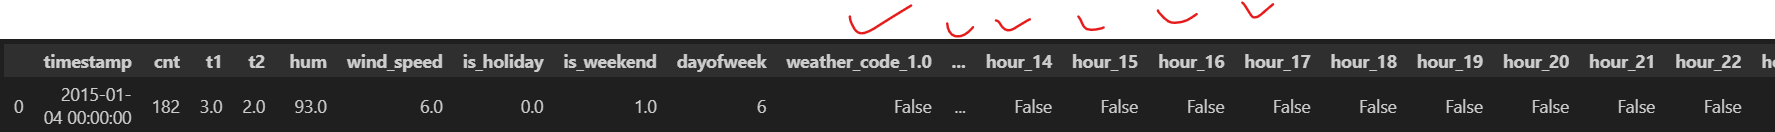



### 독립변수와 종속변수를 분리

#### 독립변수
  >>> 모델이 예측을 수행하는데 사용하는 입력데이터
  >>> 종속변수에 영향을 미칠수 있는 특성
  >>> ex) 여기선 날씨, 시간, 계절등이 존재
#### 종속변수
  >>> 예측하거나 분석하려는 주요 관심 대상
  >>> ex) 여기선 cnt(자전거 대여 횟수)같은 값을 의미

In [ ]:
# 종속변수 df_y : 모델이 예측하려는 종속변수(여기선 cnt라는 칼럼)
df_y= df_out['cnt']

# 독립변수 df_x:  cnt(종속변수)와  timestamp 칼럼을 제거한 모든 열            /////-> timestamp(우리가 시간을 찍으려고 만들었던 칼럼임)
df_x= df_out.drop(['timestamp','cnt'],axis=1)  # axis=1 열방향으로 데이터 제거한다는 의미


df_x.head() # cnt,timestamp 제거된 모든 칼럼 출력
df_y.head() # cnt




x,y 분리완료
### 마지막 단게:  훈련용이랑 테스트 분리과정

이유:수학시험을 치기전에 문제집을 받앗는데 천문제 , 문제집으로 시험보고 문제집만 보면 당연히 잘보지
하지만 랜덤 700개로만 공부하고 랜덤 300개중에 시험을 치면 학습이 잘됏는지 확인이 가능 -> 이렇게 분리하는 과정이 필요하기 때문

In [ ]:
# 훈련용 , 테스트용 데이터 분리

from sklearn.model_selection import train_test_split

# df_x: cnt,timestamp 제거된 모든 칼럼(독립변수)
# df_y: cnt (종속변수)

x_train, x_test,y_train, y_test=train_test_split(df_x,df_y,random_state=66,test_size=0.3,shuffle=False)
#  옵션설명
 # random_state: 같은 시드값으로 섞으면 매번동일한 결과를 얻음
 # test_size: 훈련, 테스트 비율설정 0.3:0.7로 각각 변수에 대입됌
 # shuffle: 데이터는 원본 순서대로 분할된다. : 시계열이므로 안섞이게 false로 설정
    # | shuffle-true인 경우: 데이터가 무작위로 섞여 각 분할에 데이터가 고르게 분포되도록 함(훈련과정에 편향을 줄이고 일반화 성능을 높이는데 도움이 됨)

In [ ]:
print(df_out.shape)
# 70대 30 비율로 x y가 나뉨
print('x_train의 구조는',x_train.shape)  # 70% , 독립변수 학습
print('y_train의 구조는',y_train.shape) # 70% , 종속변수 학습
print('x_test의 구조는',x_test.shape) # 30% , 독립변수 학습
print('y_test 구조는',y_test.shape) # 30% , 종속변수 학습


# 딥러닝  keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential # 딥러닝 층을쌓아서 하는 방식으로 진행할것임
from keras.layers import Dense
from keras.callbacks import EarlyStopping  # 중간에 과적합이 되지 않도록 사용하는 라이브러리



### Dense 레이어
 
``` 1. 가장 기본적인 신경망 층 중 하나 ``` <br>
``` 2. 모든 입력노드가 다음층의 모든 노드와 연결되어 있는 구조```


### Dense 레이어의 주요 구성 요소

 ```  1. units: 해당층에 존재하는 뉴런(노드)의 수 지정 (층의 출력 차원 결정) ```
       <br>

 ```  2. activation: 뉴런 출력에 적용되는 활성화 함수 정의```  
 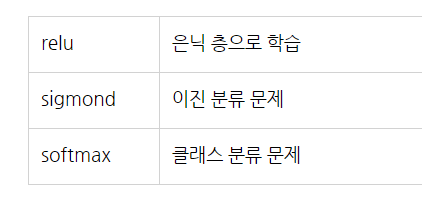 
 활성화 함수 종류 사진
   <br>
   <br>
   <br>
 >  활성화 함수는 뉴런의 출력을 비선형으로 만들어 신경망이 복잡한    <br>
    문제를 해결 가능하게 도움   <br> <br>
    ex> relu: 가장 널리 사용되는 활성화 함수중 하나
    : 입력이 양수일 경우 그대로 출력, 음수일 경우 0을 출력한다


In [ ]:
model= Sequential()
# 층을 쌓음
 
model.add(Dense(units=160,activation='relu',input_dim=57)) # 1층
model.add(Dense(units=60,activation='relu'))# 2층
model.add(Dense(units=20,activation='relu'))# 3층

# 마지막층 - 시간대별 자전거 수요를 예측하는것 이므로 1개로 결과가 나와야함 -> units=1
model.add(Dense(units=1,activation='linear'))

In [ ]:
model.summary()

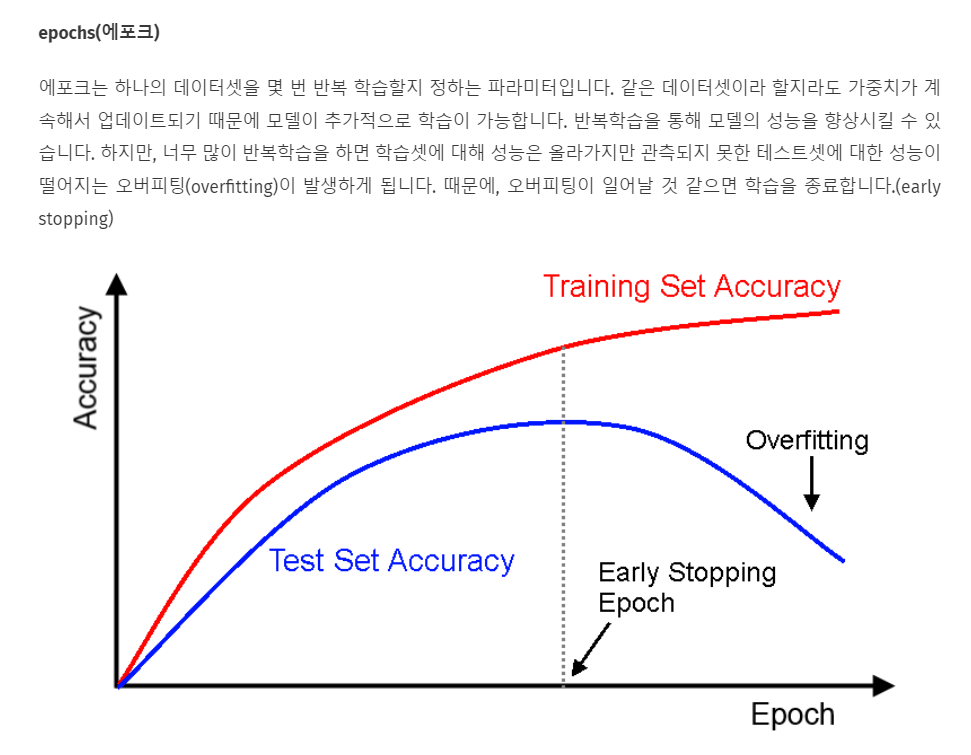

### 손실함수 (loss)
```1. 모델이 얼마나 잘못 예측했는지 측정하는 방법 ``` <br>
```2. 여기서 mae는 실제 값과 예측 값의 차이를 절대값으로 바꾼뒤 평균을 내는 방식```

### ____________________________
### 최적화 방법(optimizer)
```1.모델이 학습하는 방식을 결정 ``` <br>
```2. 신경망의 가중치를 조정하여 손실 함수의 값을 최소화 하거나 최적화 하는데 사용되는 방법 ```


<br>
## adam 

``` adam(Adaptive moment estimation): 기울기의 제곱에 대한 추정과 그라디언트 자체에 대한 추정을 모두 계산하여 가중치를 조정 ```
### ____________________________


### 성능지표(metrics)
```1.학습하는 동안 모델의 성능을 어떻게 체크할지 결정 ``` <br>
```2. 여기도 mae사용해 모델의 학습 능력을 계속 확인```

### 조기종료 earlyStropping: 
### 모델이 훈련데이터에 너무 잘맞춰져서, 성능이 안좋아지는 과적합 예방
### ________________________________________

### monitor
```1.어떤 값을 기준으로 성능을 평가할지 결정  ``` <br>
```2. 여기선 loss로 성능평가: 손실을 살펴보며 학습의 진행 상황 판단  ```
### ________________________________________

### patience
```1.모델의 성능이 개선되지 않을때 몇번의 학습(에폭)을 더 진행할지 설정  ```<br>
```2. 여기선 5로 5번의 성능개선이 안보여도 학습을 더 하도록 설정된것임 ```
### ________________________________________


### mode
```1.min으로 설정된 경우 monitor에서 설정된 값이 작아져야 한다는 의미  ```<br>
```2. loss를 ㄹ모니터링 할때 일반적으로 min을 설정: 왜냐면 손실값을 최소화 하는 모델```

### ________________________________________

### 작동원리
```1. 학습과정에서 매 에폭마다 손실을 체크한다```
```2. 만약 손실이 이전 최저 손실보다 작아지면, 그것이 새로운 최저 손실이 되는것```<br>
```3. 만약 손실이 계속 안 줄어들고 이전 최전 손실보다 더 낮아지지 않으면 patience에 설정된 에폭수만큼 기다림```<br>
```4. 그 기간동안에도 손실이 개선되지 않으면 학습을 멈춘다```<br>



### ________________________________________


history=model.fit(x_train,y_train,epochs=50, batch_size=1,validation_split=0.1,callbacks=[early_stopping])부분에 대한 설명


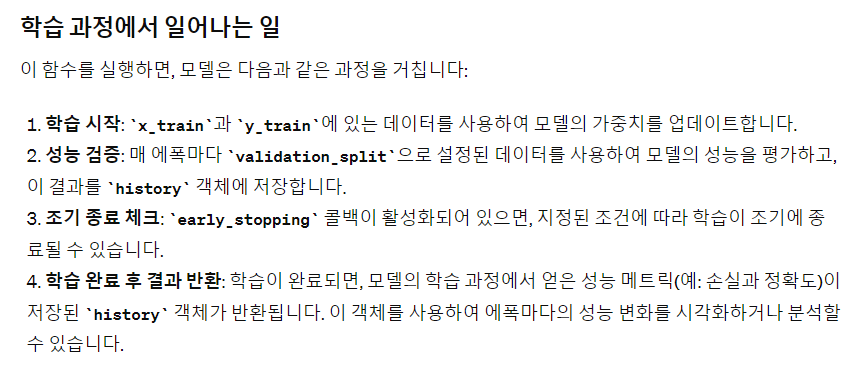

In [ ]:

model.compile(loss='mae',optimizer='adam',metrics=['mae'])
early_stopping=EarlyStopping(monitor='loss',patience=5,mode='min')


# x_train: 70% , 독립변수 학습데이터
# y_train: 70% , 종속변수 학습데이터
# 신경망을 훈련시키는 fit 함수
history=model.fit(x_train,y_train,epochs=50, batch_size=1,validation_split=0.1,callbacks=[early_stopping]) 

# 옵션 설명
# 1. epochs: 모델이 학습 데이터 셋을 전체적으로 50번 반복해 학습 (한번의 에폭: 전체 데이터 셋을 한번 통과하는 것을 의미) 
# 2. batch_size=1 : 학습데이터 셋에서 한번에 1개의 샘플씩 가중치를 업데이트하는데 사용된다.

# 3.validation_split=0.1:
## 70%의 훈련데이터 x_train에서도 10%를 검증 데이터로 분리하여 사용
## 모델이 학습하는 동안 성능을 검증하는 데 사용되며, 모델이 훈련데이터에 과적합되는걸 방지

# 4. callbacks=[early_stopping]: 콜백은 학습을 조기에 종료시키기 위해 사용


# 1-8강 머신러닝 , 딥러닝

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss 비교')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss','loss'])
plt.show()



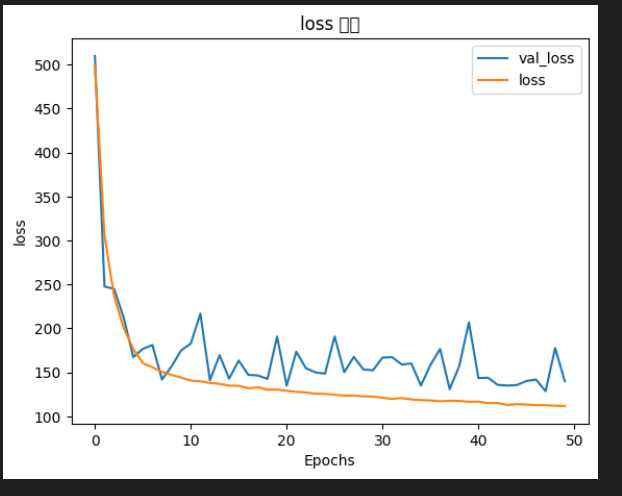

In [ ]:
y_predict=model.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))
print("RMSE:",RMSE(y_test,y_predict))


RMSE: 267.12058464949706


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,random_state=16)
rf.fit(x_train,y_train)
rf_result=rf.predict(x_test)
print('RMSE',RMSE(y_test,y_result))